# Assessing Data Quality

### Basic information

In [37]:
import pandas as pd
dt_cyclists = pd.read_csv('../dataset/cyclists.csv')
dt_cyclists.head()

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France
2,jan-maas,Jan Maas,1996.0,69.0,189.0,Netherlands
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,78.0,192.0,Belgium
4,jose-felix-parra,José Félix Parra,1997.0,55.0,171.0,Spain


In [38]:
dt_cyclists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB


In [41]:
# Count the number of rows missing both weight and height
missing_weight_height_count = dt_cyclists[dt_cyclists['weight'].isna() & dt_cyclists['height'].isna()].shape[0]
print(f"Number of rows missing both weight and height: {missing_weight_height_count}")
missing_weight_or_height_count = dt_cyclists[dt_cyclists['weight'].isna() | dt_cyclists['height'].isna()].shape[0]
print(f"Number of rows missing either weight or height: {missing_weight_or_height_count}")

Number of rows missing both weight and height: 2984
Number of rows missing either weight or height: 3063


this tells us we can't use a regressor

### Fat athletes?

From this simple command we are alredy able to see that the only colums that have a considerable number of missing values are the _weight_ and _height_ features. 

We can probably address this by using another dataset of cyclist or by creating a simple regressor that takes as input the _nationality_ and the [_height_ | _weight_]

To follow the classifier approach we need to see if there is a good correlation between height weight and nationality

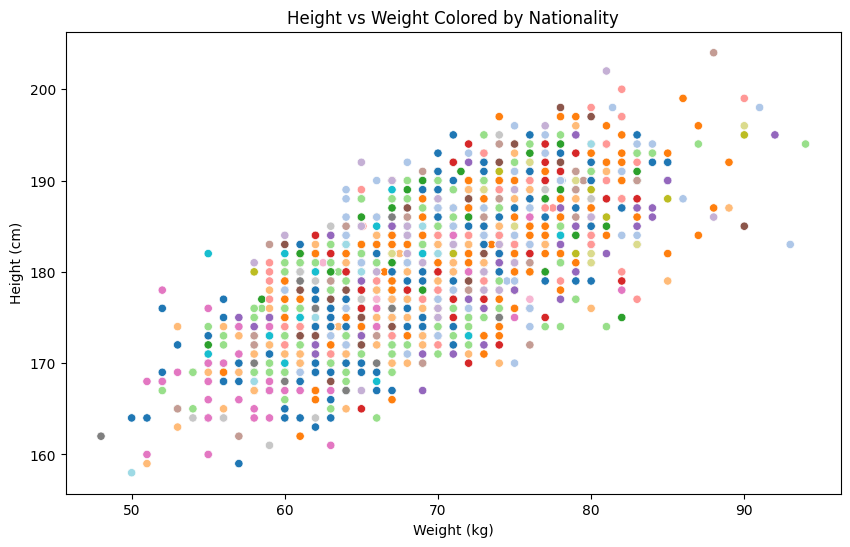

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_nationalities = ['Italy', 
                          'France', 
                          #'United States', 
                          'Russia'
                          ]
selected_nationalities = None
show_legend = True if selected_nationalities else False

# Drop rows with missing values in weight or height
dt_cyclists_clean = dt_cyclists.dropna(subset=['weight', 'height'])

# Filter the data to include only the selected nationalities
if selected_nationalities:
    dt_cyclists_clean = dt_cyclists_clean[dt_cyclists_clean['nationality'].isin(selected_nationalities)]

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dt_cyclists_clean, x='weight', y='height', hue='nationality', palette='tab20', legend='full')
plt.title('Height vs Weight Colored by Nationality')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.legend(title='Nationality', bbox_to_anchor=(1.05, 1), loc='upper left')
if not show_legend:
    plt.legend([],[], frameon=False)
plt.show()


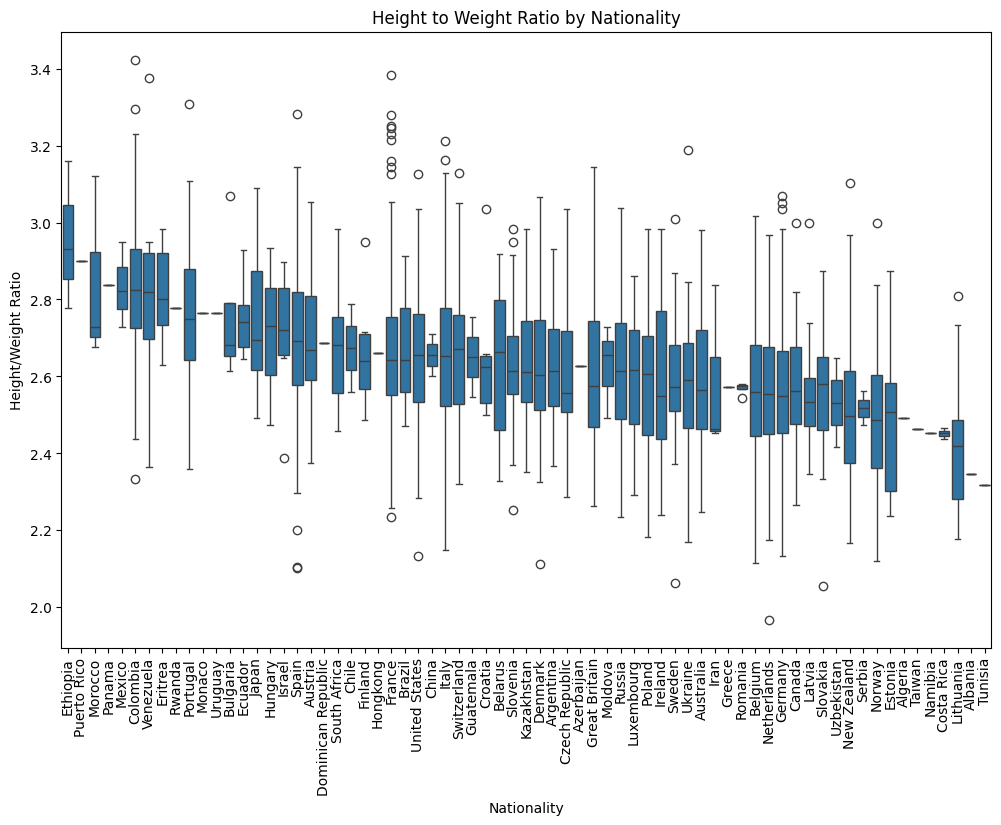

In [32]:
# Calculate the ratio between height and weight
dt_cyclists_clean.loc[:, 'height_weight_ratio'] = dt_cyclists_clean['height'] / dt_cyclists_clean['weight']
# Calculate the average height_weight_ratio for each nationality and sort
avg_ratio_by_nationality = dt_cyclists_clean.groupby('nationality', observed=True)['height_weight_ratio'].mean().sort_values(ascending=False)

# Sort the dataframe by avg_ratio_by_nationality index
sorted_nationalities = avg_ratio_by_nationality.index
dt_cyclists_clean.loc[:,'nationality'] = pd.Categorical(dt_cyclists_clean['nationality'], categories=sorted_nationalities, ordered=True)

# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=dt_cyclists_clean.sort_values('nationality'), x='nationality', y='height_weight_ratio')
plt.title('Height to Weight Ratio by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Height/Weight Ratio')
plt.xticks(rotation=90)
plt.show()

give this 2 plots it probably make sense to make the classifier since each nation seem to have divverent levels of height. But looking at the boxplot there is a problem, some nationalities are probably underrepresented: let's se which are this nationality by sorting by the number of times an athlete is labeled as appartaining to a given nation.

We can also see some athletes that can be considered outlier by just looking at the first plot

By looking at the below chart it looks like we have a problem i.e. we probably cannot compute significant statistics for each country but only for a restricted number of them


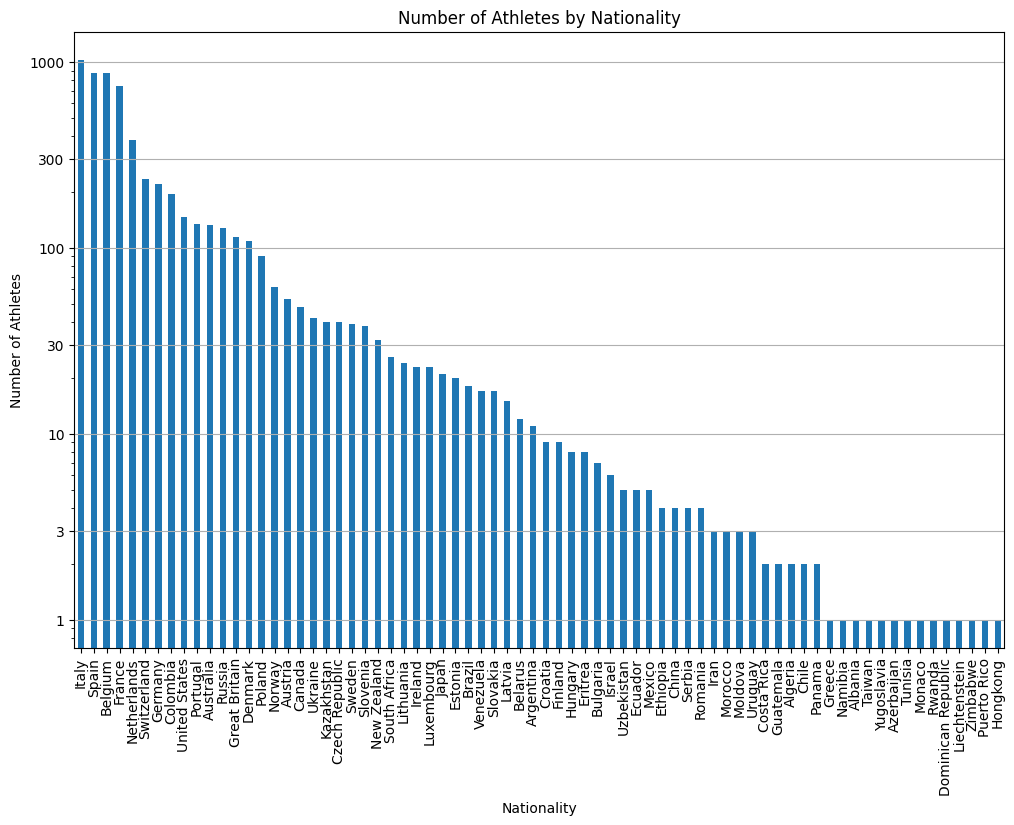

In [26]:
# Count the number of occurrences of each nationality
nationality_counts = dt_cyclists['nationality'].value_counts()

# Sort the nationalities by the number of occurrences
sorted_nationality_counts = nationality_counts.sort_values(ascending=False)


# Display the sorted nationalities and their counts
# Plot the sorted nationalities and their counts
plt.figure(figsize=(12, 8))
sorted_nationality_counts.plot(kind='bar')
plt.title('Number of Athletes by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of Athletes')
plt.yscale('log')
plt.yticks([1, 3, 10, 30, 100, 300, 1000], ['1', '3', '10', '30', '100', '300', '1000'])
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show()

### Birth year

probably a last intrresting thing can be to see when people were born

this does not seem intresting, the shape of the histogram is what it is probably because the "old" athletes were the oly remaining in the year span the dataset was considering, and a similar reasoning can be done for the "youg" athletes. This does not mean that cyclism was not popular for people born before 1940...

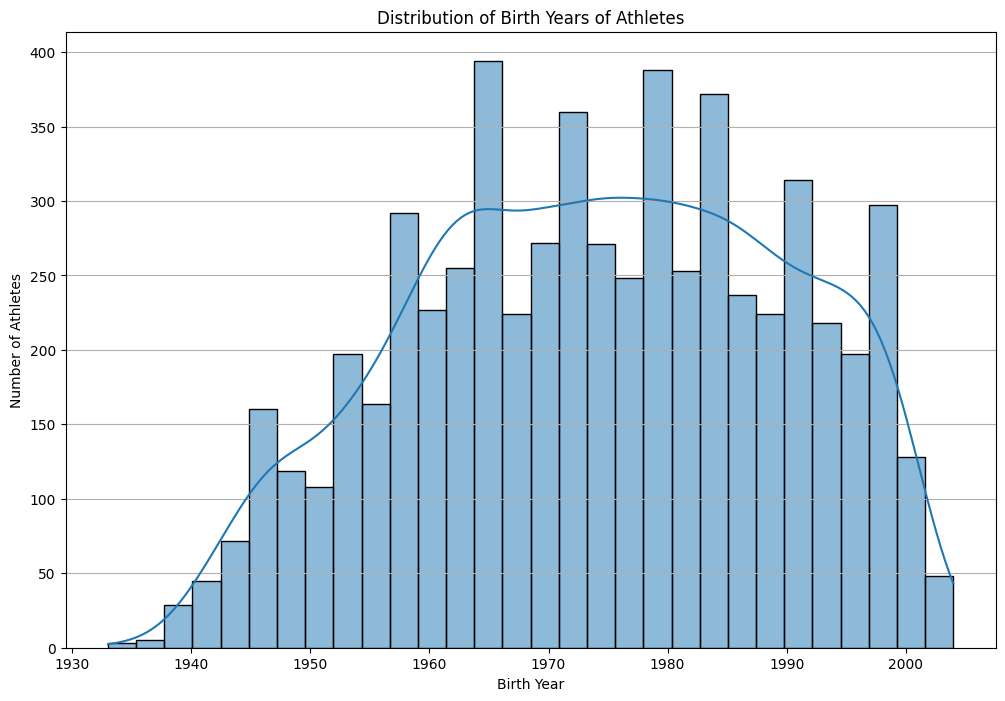

In [39]:
# Plot the distribution of birth years
plt.figure(figsize=(12, 8))
sns.histplot(dt_cyclists['birth_year'].dropna(), bins=30, kde=True)
plt.title('Distribution of Birth Years of Athletes')
plt.xlabel('Birth Year')
plt.ylabel('Number of Athletes')
plt.grid(axis='y')
plt.show()